# Importing dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import time

# Uploading and Reading Data

In [2]:
df = pd.read_csv("alzheimers_disease_patient_data.csv")


# viewing data and getting some information about it such as:


1. missing values
2. duplicates
3.  statistical information



In [3]:
df.shape

(2143, 35)

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.93,0,13.30,6.33,1.35,...,0,0,1.73,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.83,0,4.54,7.62,0.52,...,0,0,2.59,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.80,0,19.56,7.84,1.83,...,0,0,7.12,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.80,1,12.21,8.43,7.44,...,0,1,6.48,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.72,0,18.45,6.31,0.80,...,0,0,0.01,0,0,1,1,0,0,XXXConfid


checking for missing values

In [5]:
print(df.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

checking for duplicates

In [6]:
print(df.duplicated().sum())

0


statistical information

In [7]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00,...,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00,2143.00
mean,5822.00,74.92,0.51,0.70,1.29,27.66,0.29,10.04,4.92,4.99,...,5.08,0.21,0.16,4.98,0.21,0.16,0.15,0.16,0.30,0.35
std,618.78,9.00,0.50,1.00,0.91,7.21,0.45,5.76,2.86,2.91,...,2.89,0.41,0.36,2.95,0.40,0.37,0.36,0.37,0.46,0.48
min,4751.00,60.00,0.00,0.00,0.00,15.01,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5286.50,67.00,0.00,0.00,1.00,21.62,0.00,5.15,2.56,2.45,...,2.57,0.00,0.00,2.34,0.00,0.00,0.00,0.00,0.00,0.00
50%,5822.00,75.00,1.00,0.00,1.00,27.82,0.00,9.94,4.77,5.07,...,5.09,0.00,0.00,5.04,0.00,0.00,0.00,0.00,0.00,0.00
75%,6357.50,83.00,1.00,1.00,2.00,33.87,1.00,15.16,7.43,7.55,...,7.55,0.00,0.00,7.58,0.00,0.00,0.00,0.00,1.00,1.00
max,6893.00,90.00,1.00,3.00,3.00,39.99,1.00,19.99,9.99,10.00,...,10.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00


# Checking the distribution of data types in columns and getting rid of irrelevant features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2143 non-null   int64  
 1   Age                        2143 non-null   int64  
 2   Gender                     2143 non-null   int64  
 3   Ethnicity                  2143 non-null   int64  
 4   EducationLevel             2143 non-null   int64  
 5   BMI                        2143 non-null   float64
 6   Smoking                    2143 non-null   int64  
 7   AlcoholConsumption         2143 non-null   float64
 8   PhysicalActivity           2143 non-null   float64
 9   DietQuality                2143 non-null   float64
 10  SleepQuality               2143 non-null   float64
 11  FamilyHistoryAlzheimers    2143 non-null   int64  
 12  CardiovascularDisease      2143 non-null   int64  
 13  Diabetes                   2143 non-null   int64

In [9]:
df["PatientID"]

0       4751
1       4752
2       4753
3       4754
4       4755
        ... 
2138    6889
2139    6890
2140    6891
2141    6892
2142    6893
Name: PatientID, Length: 2143, dtype: int64

Since the PatientID column is irrelevant we need to exclude it

In [10]:
df.drop(columns="PatientID",inplace=True,errors="ignore")

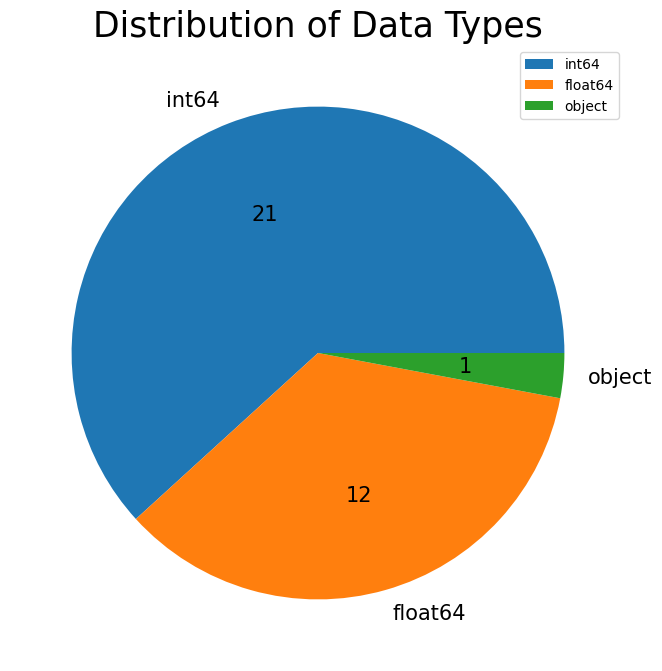

In [11]:
count_of_each_type = df.dtypes.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(count_of_each_type, labels=count_of_each_type.index ,autopct=lambda percentage : int(percentage * sum(count_of_each_type)/100), textprops = {"fontsize":15})
plt.title('Distribution of Data Types',fontsize=25)
plt.legend(loc='best',fontsize=10)
plt.show()


we can clearly see that there is only 1 object, we need to look into it



In [12]:
df.select_dtypes(include=["object"])

,DoctorInCharge
0,XXXConfid
1,XXXConfid
2,XXXConfid
3,XXXConfid
4,XXXConfid
...,...
2138,XXXConfid
2139,XXXConfid
2140,XXXConfid
2141,XXXConfid


*DoctorInCharge* is irrelevent information and will have no effect on our data and machine learning model, thus we can exclude it

In [13]:
df.drop(columns=["DoctorInCharge"],inplace=True,  errors='ignore')

# **Now that we dropped the irrelevant Data we need to look into the remaining features and extract information**

# Creating a histogram chart to understand the distrubition of each categorical features determining how is the categorical features distributed


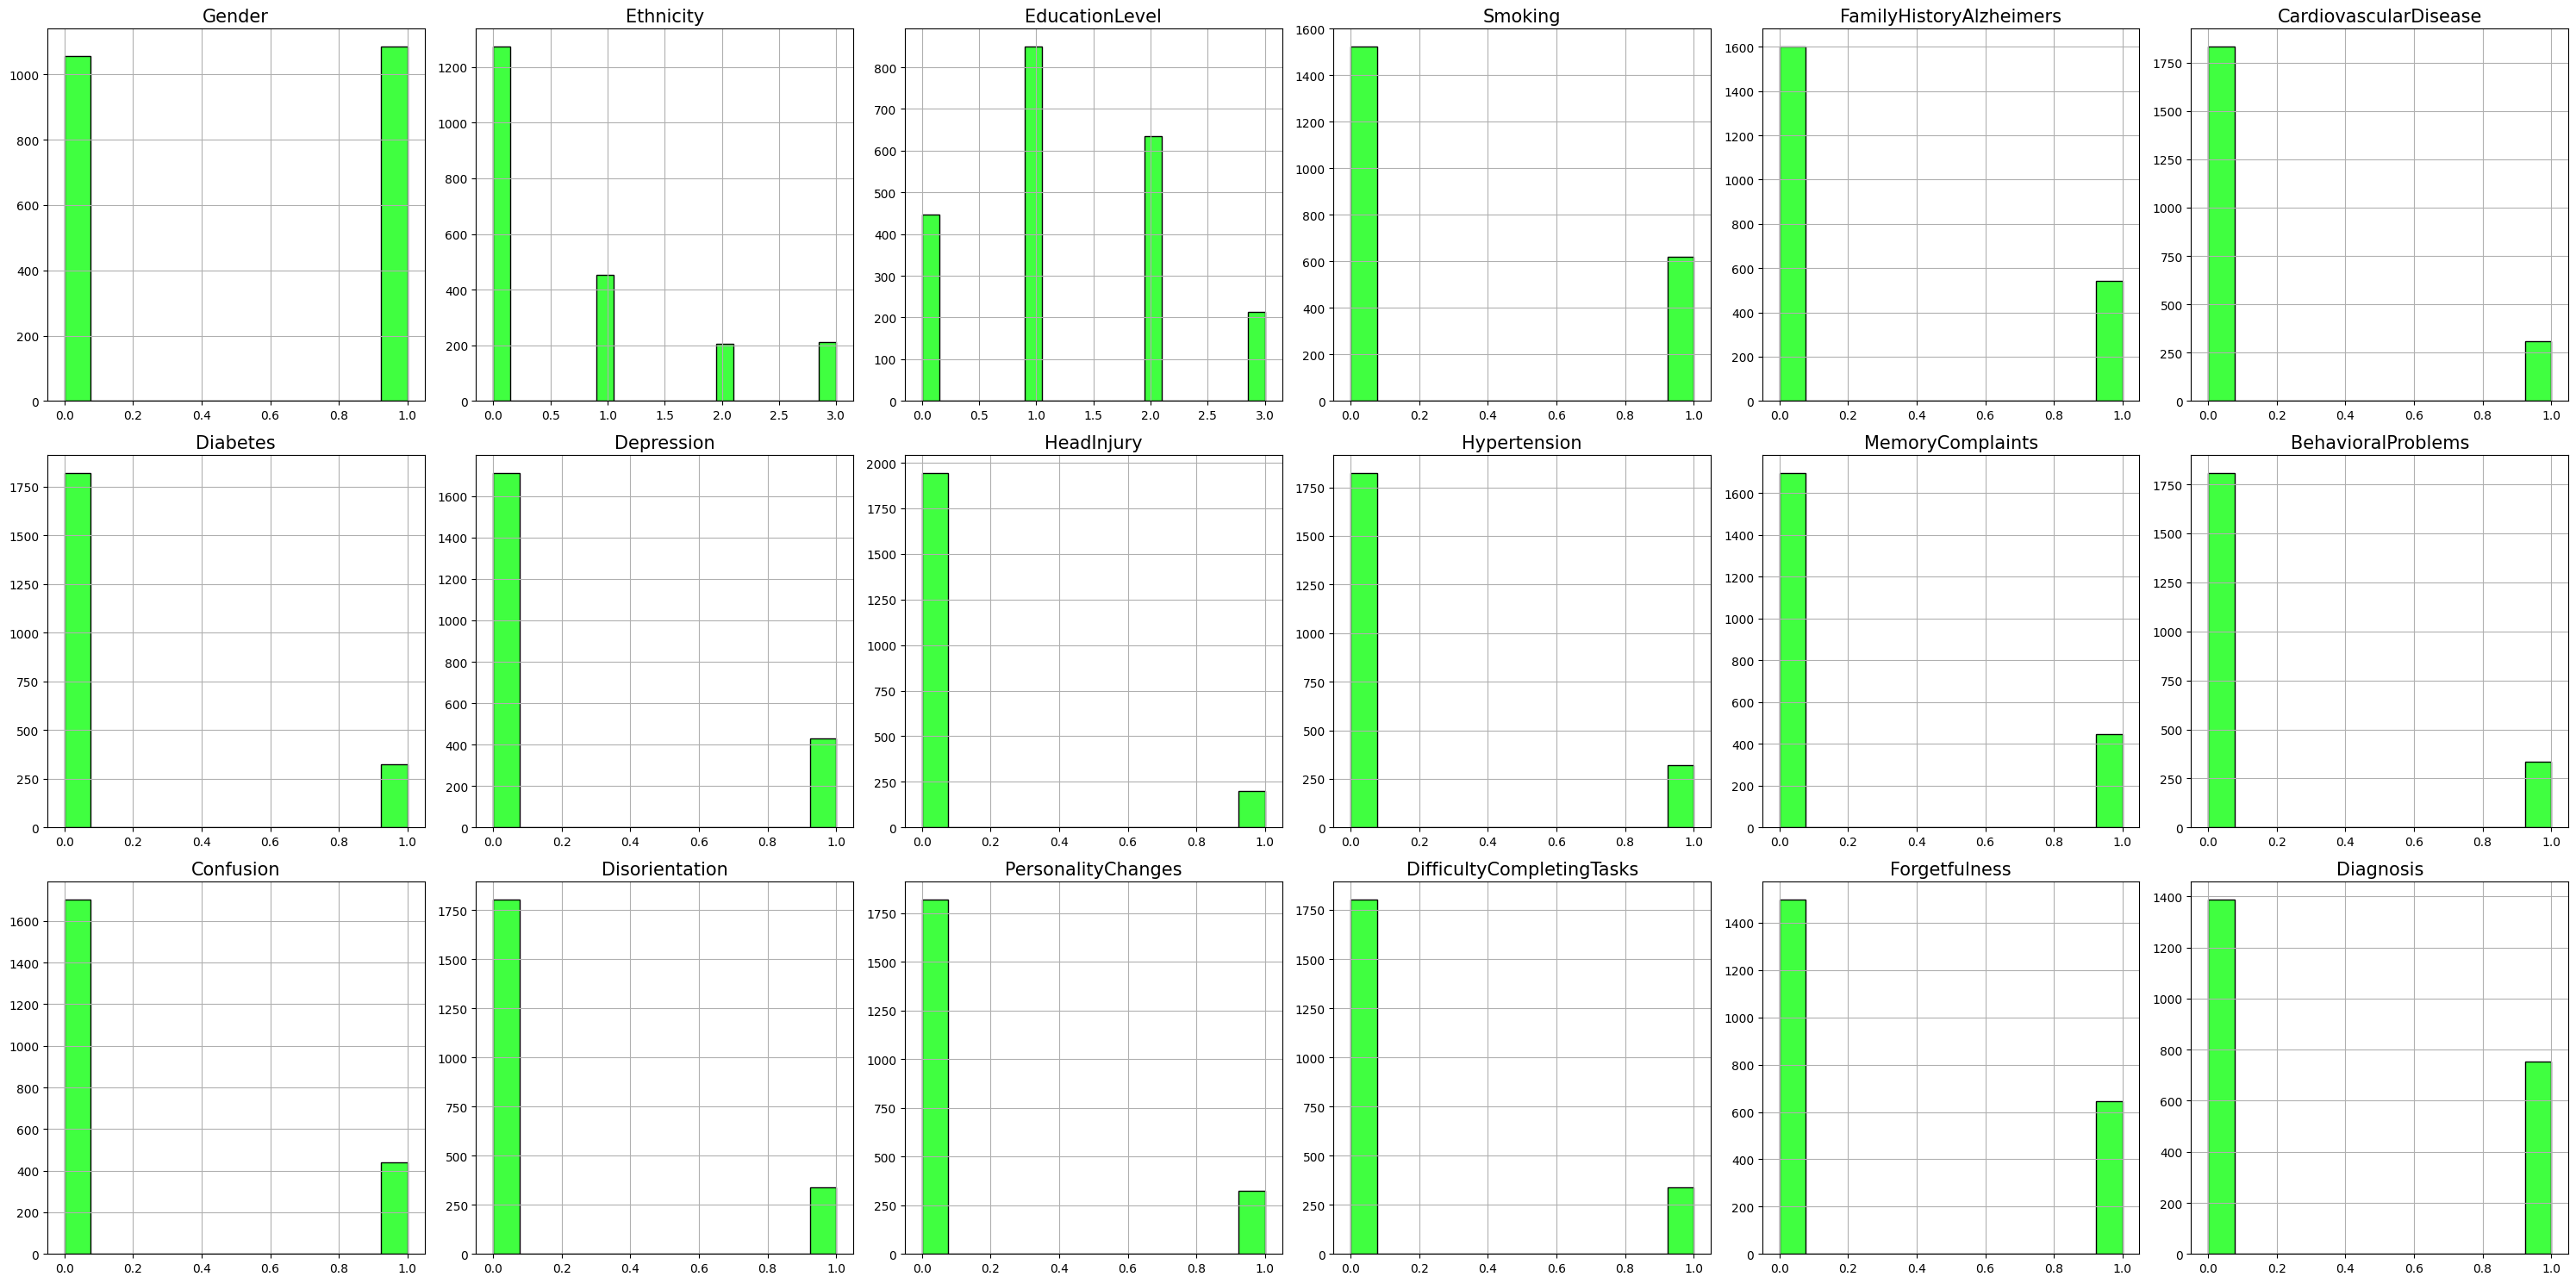

In [14]:
figure, axes = plt.subplots(nrows=3,ncols=6,figsize=(30,15))
axes = axes.flatten()
index=0

for column in df.columns:
  if df[column].value_counts().size < 5:
    sns.histplot(x=column,data=df,ax=axes[index],color="lime",edgecolor="black")
    axes[index].set_title(column,fontsize=15)
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")
    axes[index].grid(True)
    index+=1

plt.tight_layout()
plt.show()


# Visualing each feature relative to Diagnosis Status

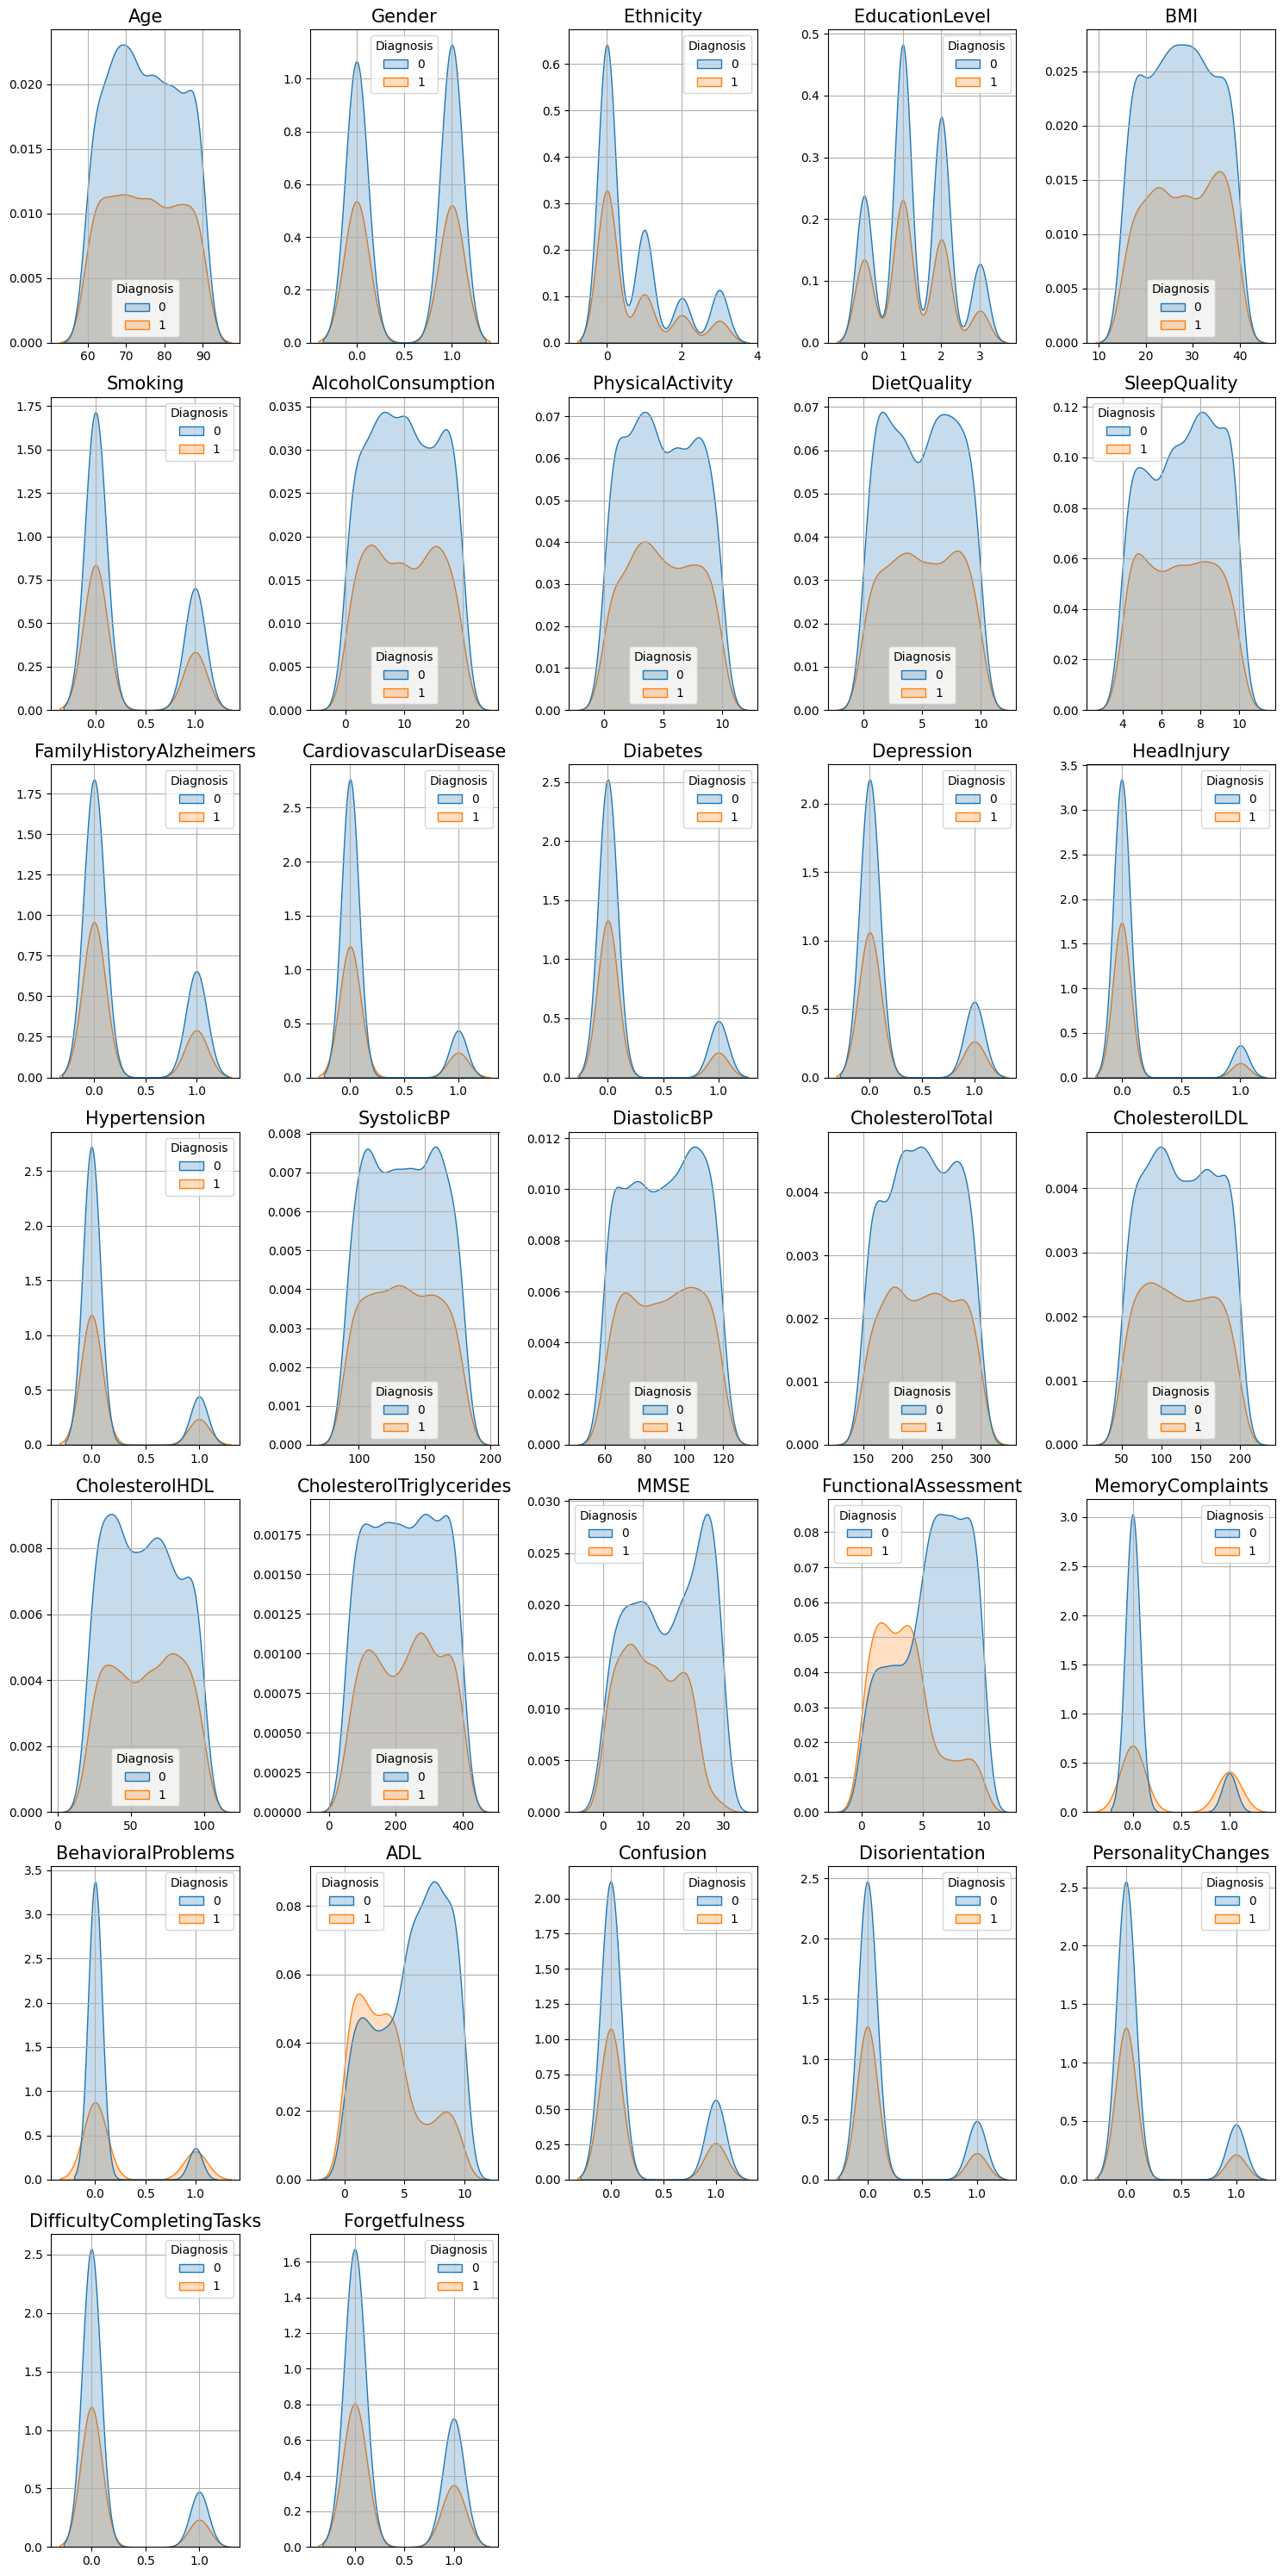

In [15]:
figure, axes = plt.subplots(nrows=7,ncols=5,figsize=(15,30))
axes = axes.flatten()
index=0
for column in df.columns:
    sns.kdeplot(df, x=column, hue="Diagnosis", ax=axes[index],warn_singular=False,fill=True)
    axes[index].set_title(column,fontsize=15)
    axes[index].set(xlabel="",ylabel="")
    axes[index].grid(True)
    index+=1
for i in range(32,35):
  figure.delaxes(axes[i])
plt.tight_layout()
plt.show()


# Heatmap to view the correlation between each pair of features

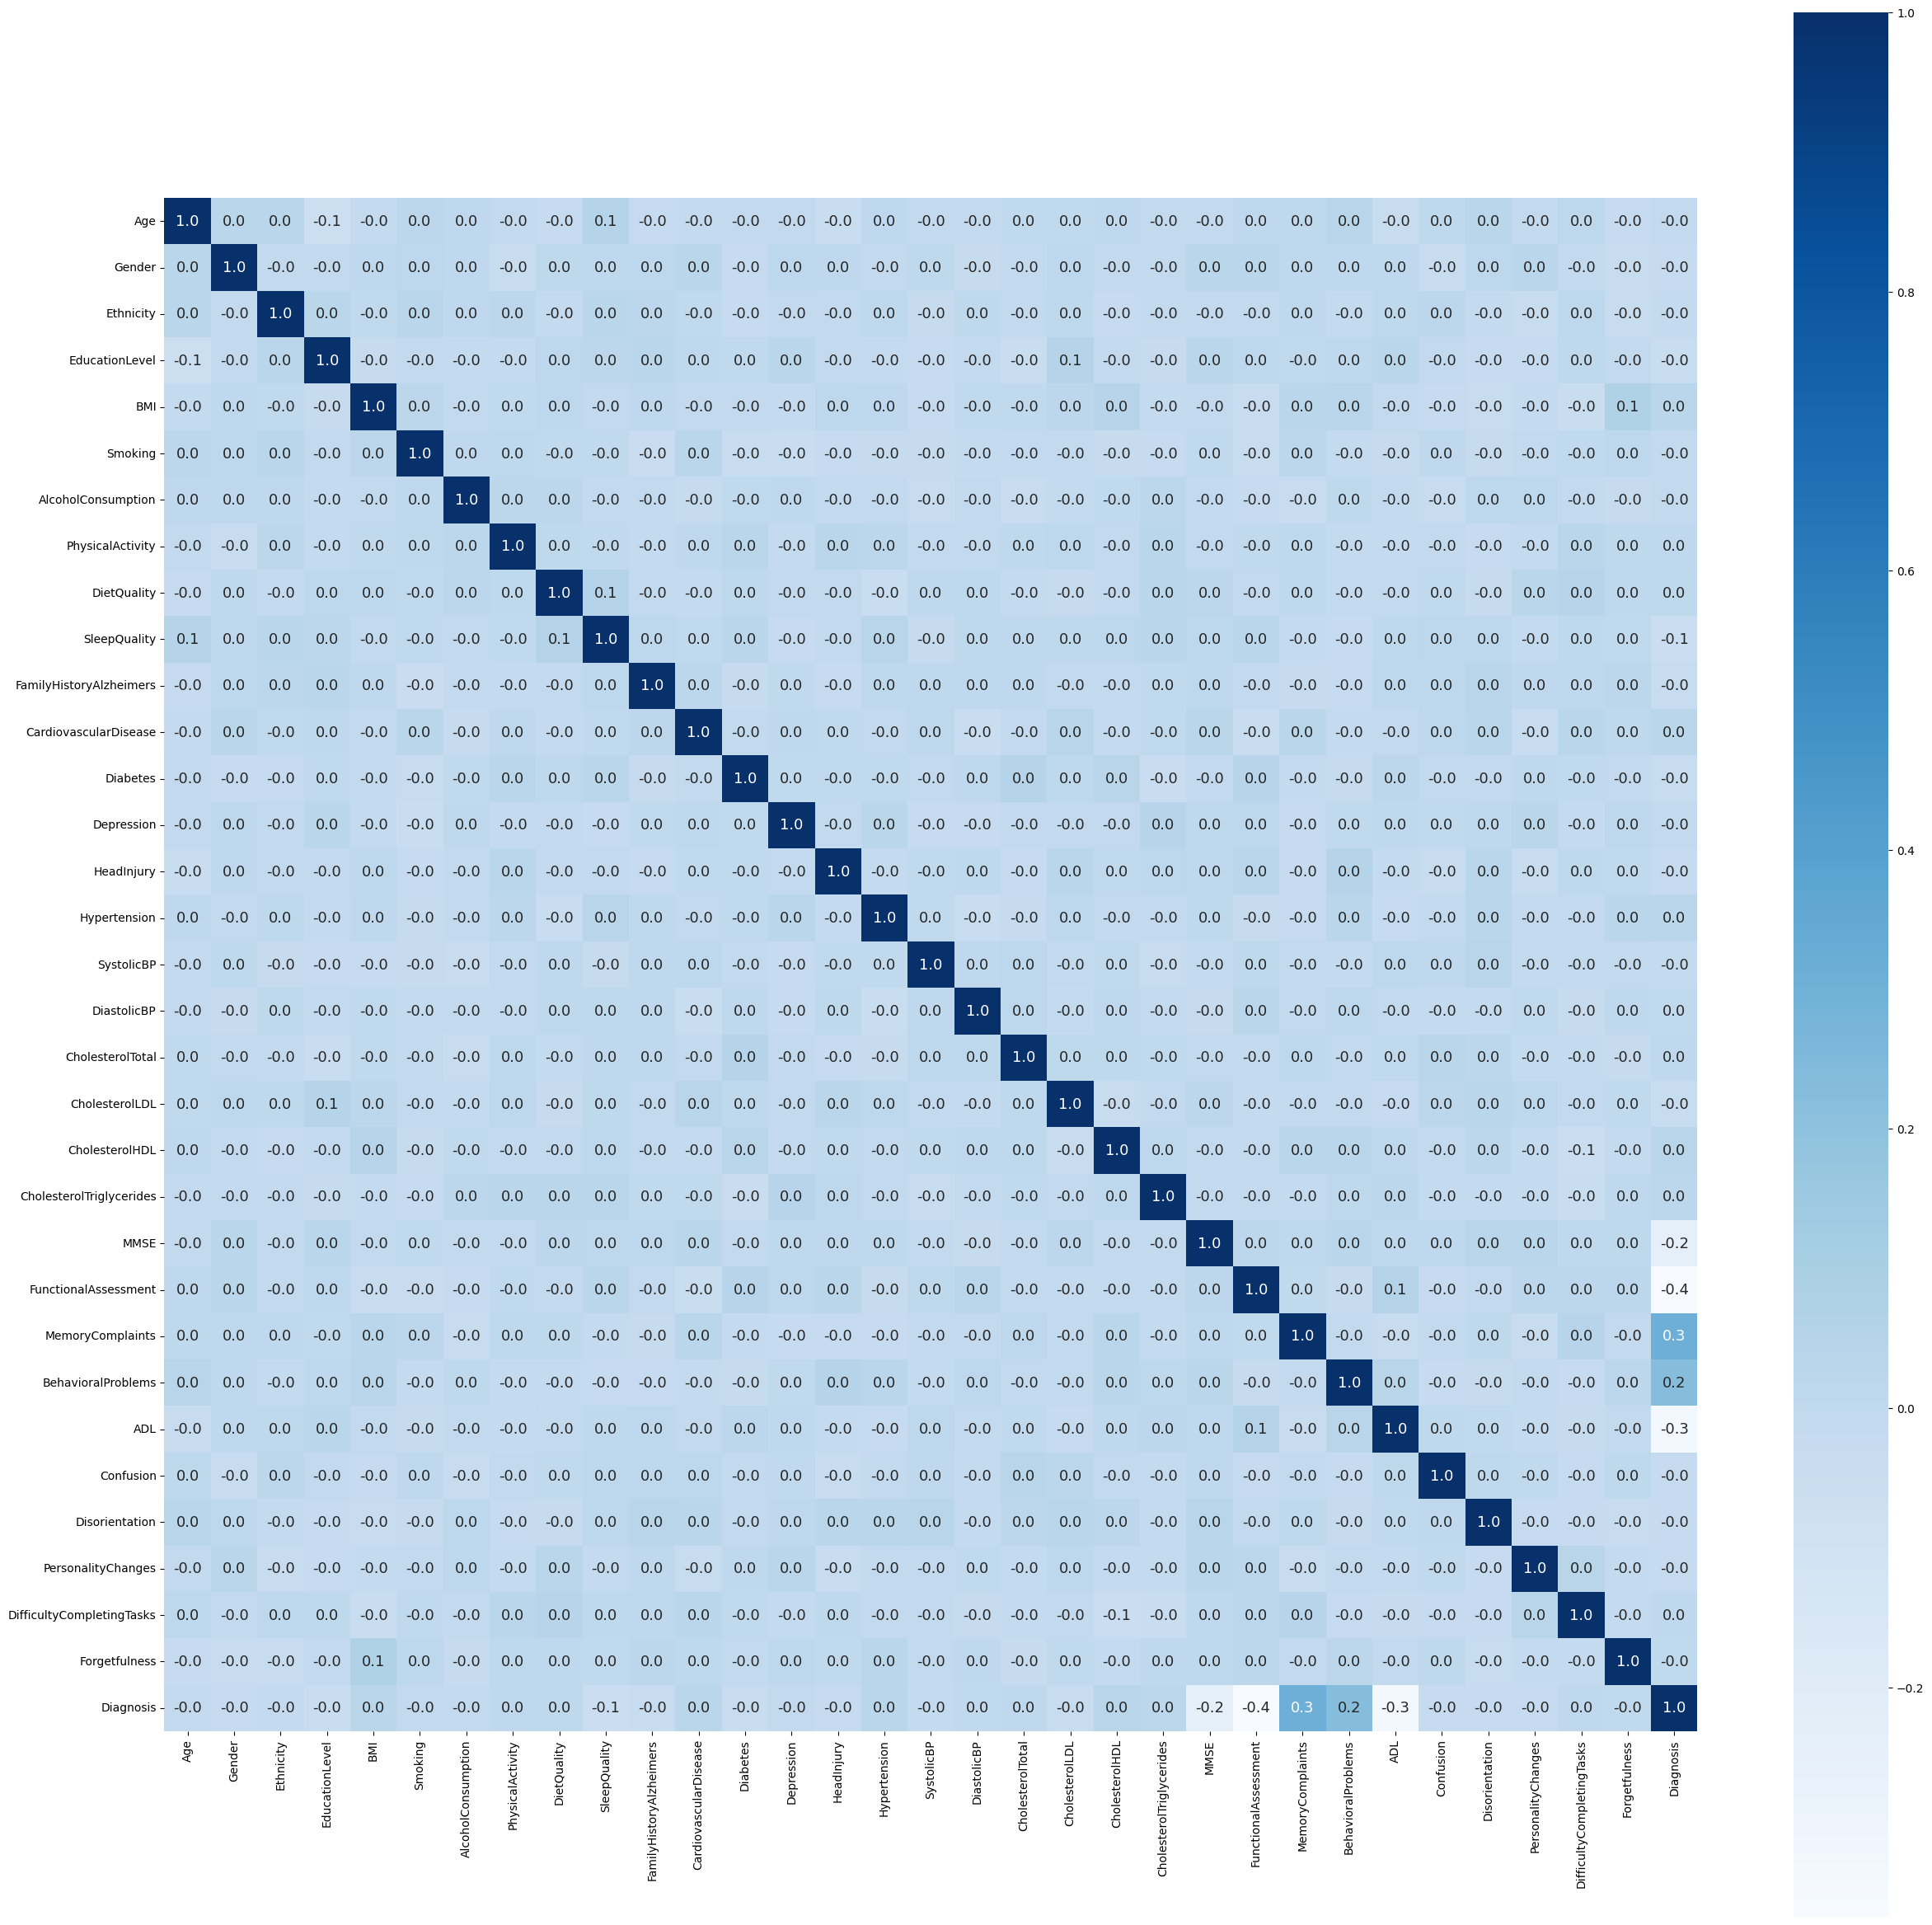

In [16]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True,cmap="Blues",cbar =True,square=True,annot_kws={"size":13},fmt=".1f")
plt.show()

we will only look at value that are +/- 0.1
lets divide the results into 3 categories:

1. positive correlation

  we have (*MemoryComplaints*, *BehavioralProblems*)

2. negative correlation

  we have (*MMSE*, *FunctionalAssessment*, *ADL*)
3. no correlation

  all the remaining features


# Checking the distribution of age in 2 aspects

  *   The frequency distribution of each age in the dataset
  *   Age distribution relative to Diagnosis Status



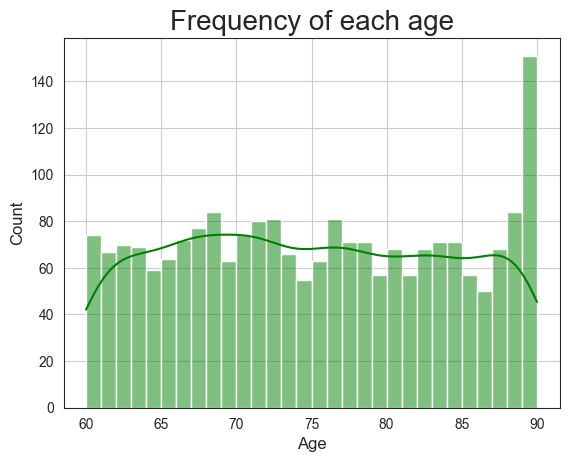

In [17]:

sns.set_style("white")
sns.histplot(df,x='Age',color='green',binwidth = 1,kde=True)
plt.title("Frequency of each age",fontsize=20)
plt.ylabel("Count",fontsize=12)
plt.xlabel("Age",fontsize=12)
plt.grid(True)


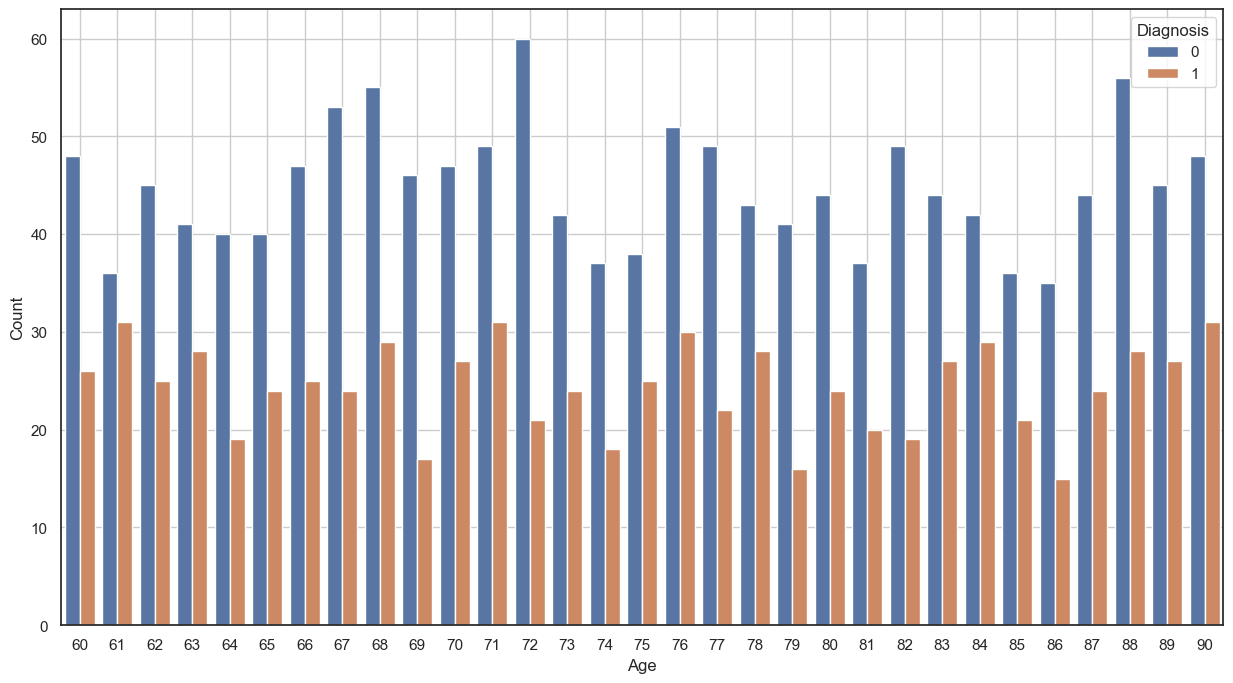

In [18]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(15,8))
sns.countplot(df,x='Age',hue="Diagnosis")
plt.title("",fontsize=20)
plt.ylabel("Count",fontsize=12)
plt.xlabel("Age",fontsize=12)
plt.grid(True)
plt.show()


# Visualing the features most relative to the Diagnosis Status (continuous data)

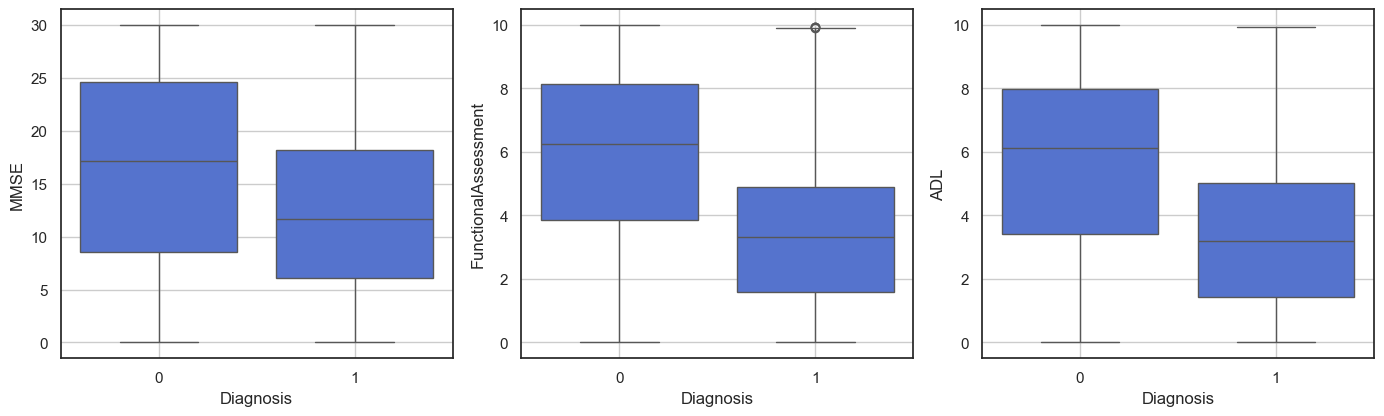

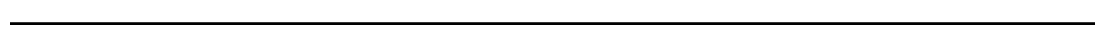

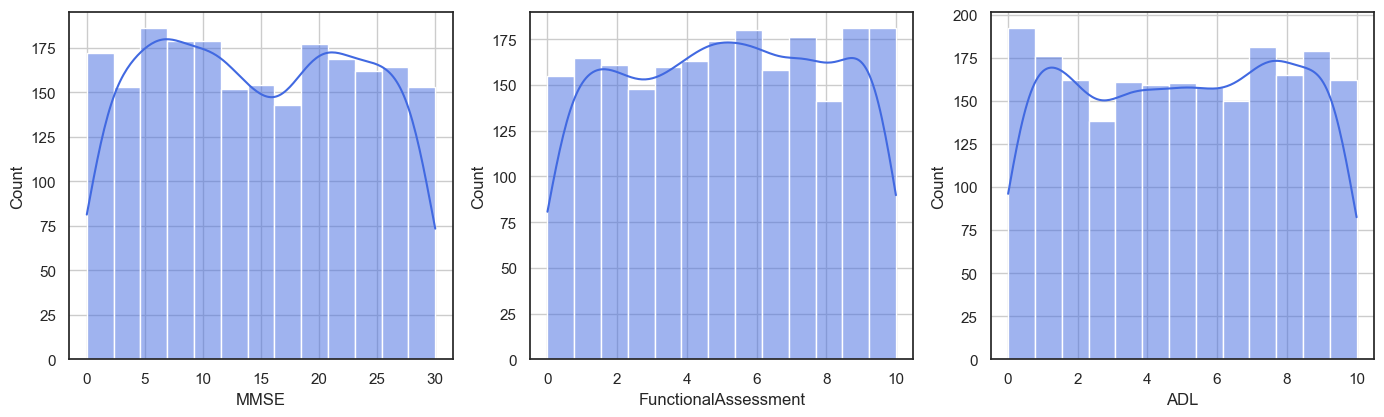

In [19]:
plt.figure(figsize=(14, 8))
columns = ['MMSE', 'FunctionalAssessment', 'ADL']

i = 1
for column in columns:
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['Diagnosis'], y=df[column],color='royalblue')
    plt.grid(True)
    i += 1
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 0.2))
plt.axhline(0, color='black', linewidth=4)
plt.axis('off')

plt.show()

plt.figure(figsize=(14, 8))
i = 1
for column in columns:
    plt.subplot(2, 3, i)
    sns.histplot(df, x=column,color='royalblue', kde=True)
    plt.grid(True)
    i += 1

plt.tight_layout()
plt.show()




*   We can see that in all three tests, the higher the test score, the lower the probability of being diagnosed with the disease, and vice versa, which indicates that there is an inverse relationship between the probability of being diagnosed with the disease and the test results
*  in addition to the frequency distribution of scores for each test




# Visualing the features most relative to the Diagnosis Status (discrete data)


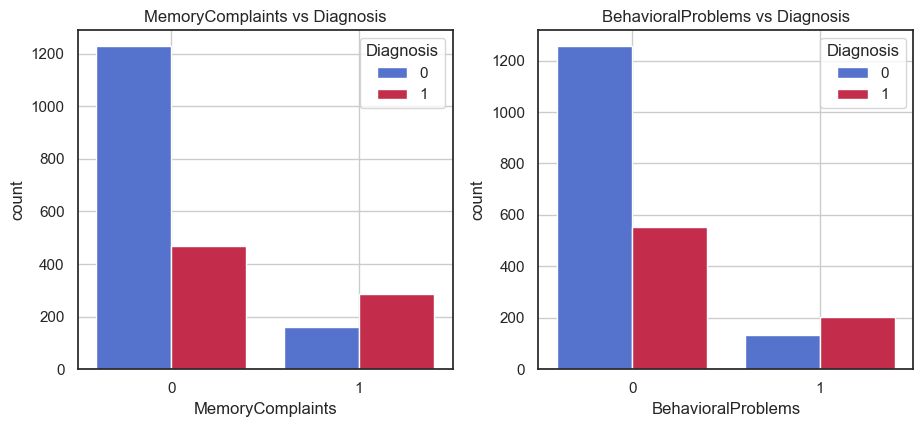

In [20]:
plt.figure(figsize=(14, 8))
columns = ['MemoryComplaints', 'BehavioralProblems']

i = 1
for column in columns:
    plt.subplot(2, 3, i)
    sns.countplot(x=df[column], hue=df['Diagnosis'],palette=['Royalblue', 'crimson'])
    plt.grid(True)
    plt.title(f'{column} vs Diagnosis')
    i += 1

plt.tight_layout()
plt.show()




*   We conclude that most people who suffer from memory compleints and behavioral problems are diagnosed with the disease
*   and that those who don't suffer from behavior problems and memory compleints have a infection rate of less than 30%



# Developing a Predictive Model

In [21]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

based on our research which included asking doctors who specialize in neurology, we only need much less features and test results in order to get the diagnosis
So we decided to test this theroy by implementing a library called lazy predict, which allows us to run 30 machine learning algorithm quickly but we will only take best 10 results, on the dataset in 2 ways, By excluding the unneccessry columns that the specialists have told us about, and by keep them then we visualize the results and compare

In [22]:
needed_columns = ['Age', 'EducationLevel','FamilyHistoryAlzheimers', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness']


models_to_look_at = ["XGBClassifier","LGBMClassifier","RandomForestClassifier","AdaBoostClassifier","BaggingClassifier","DecisionTreeClassifier","BernoulliNB","ExtraTreesClassifier","SVC","LogisticRegression"]


x = df.drop(df.columns.difference(needed_columns),axis=1)
y = df["Diagnosis"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=48)


lc = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
results_with_excluded_features,predictions = lc.fit(x_train,x_test,y_train,y_test)
final_results1 = results_with_excluded_features[results_with_excluded_features.index.isin(models_to_look_at)]

accuracy1 = [final_results1['Accuracy'][lc] for lc in models_to_look_at]
time_taken1 = [final_results1['Time Taken'][lc] for lc in models_to_look_at]


100%|██████████| 31/31 [00:01<00:00, 17.48it/s]

[LightGBM] [Info] Number of positive: 615, number of negative: 1099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 1714, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358810 -> initscore=-0.580534
[LightGBM] [Info] Start training from score -0.580534


In [23]:
x = df.drop(columns=["Diagnosis"],axis=1)
y = df["Diagnosis"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=48)

lc = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
results_with_included_features,predictions = lc.fit(x_train,x_test,y_train,y_test)
final_results2 = results_with_included_features[results_with_included_features.index.isin(models_to_look_at)]

accuracy2 = [final_results2['Accuracy'][lc] for lc in models_to_look_at]
time_taken2 = [final_results2['Time Taken'][lc] for lc in models_to_look_at]



100%|██████████| 31/31 [00:02<00:00, 11.51it/s]

[LightGBM] [Info] Number of positive: 615, number of negative: 1099
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3299
[LightGBM] [Info] Number of data points in the train set: 1714, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358810 -> initscore=-0.580534
[LightGBM] [Info] Start training from score -0.580534


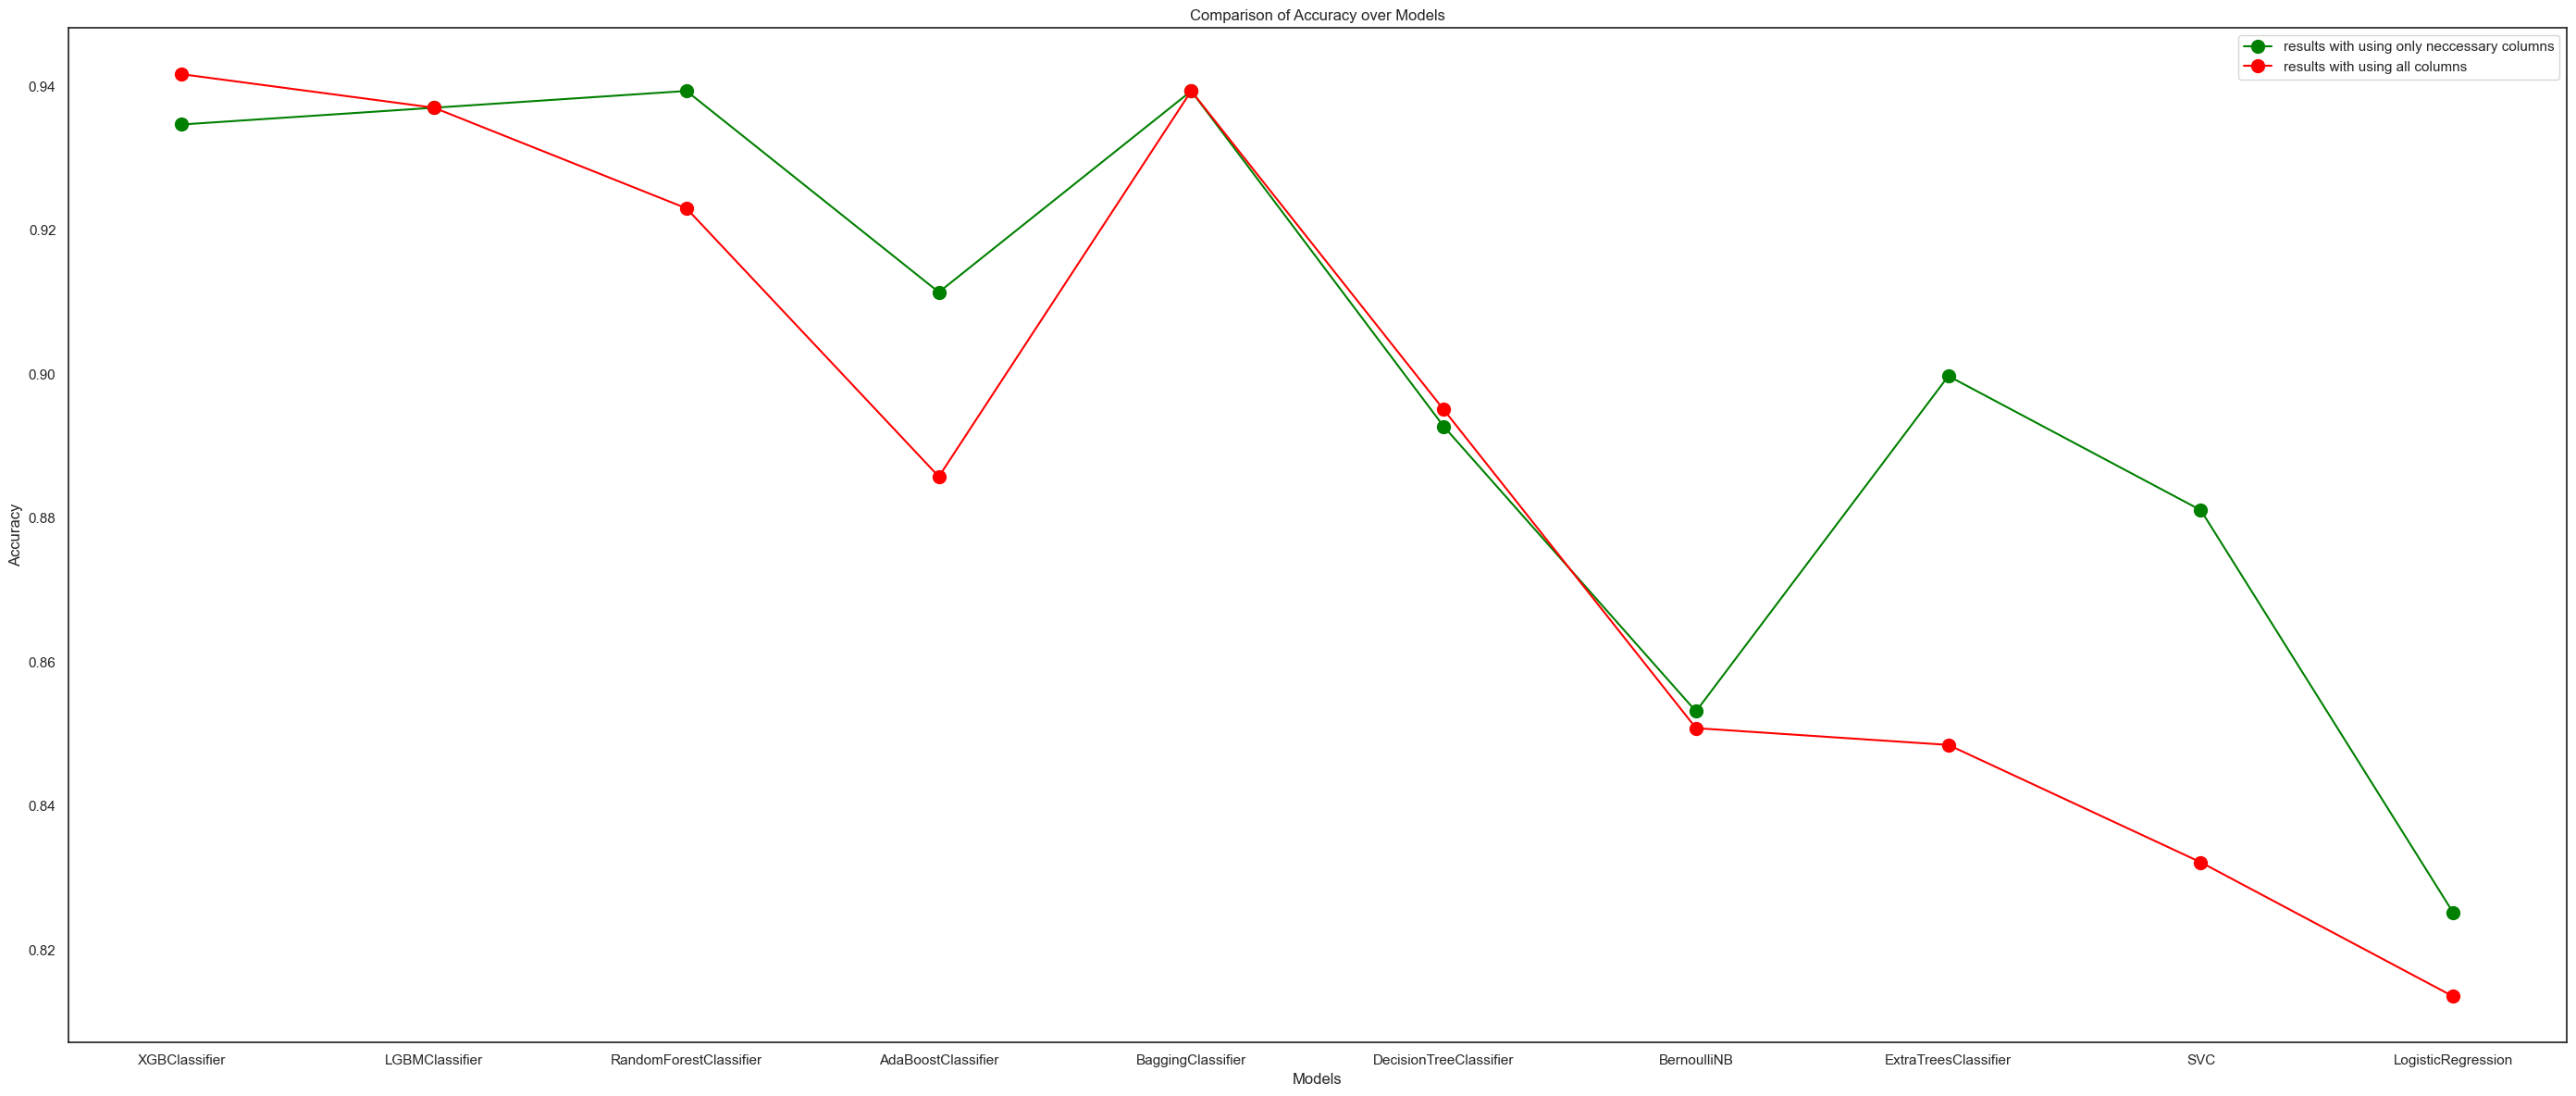

In [24]:
plt.figure(figsize=(28,12))
plt.plot(models_to_look_at,accuracy1,marker="o",markersize=10,color="green",label="results with using only neccessary columns")
plt.plot(models_to_look_at,accuracy2,marker="o",markersize=10,color="red",label="results with using all columns")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy over Models')
plt.tight_layout()
plt.legend()
plt.show()

* we can notice that the results are extremely close but using models with only the necessary features have overall better accuracies except for some models
* but time plays a great factor in models, so we will visualize it as well




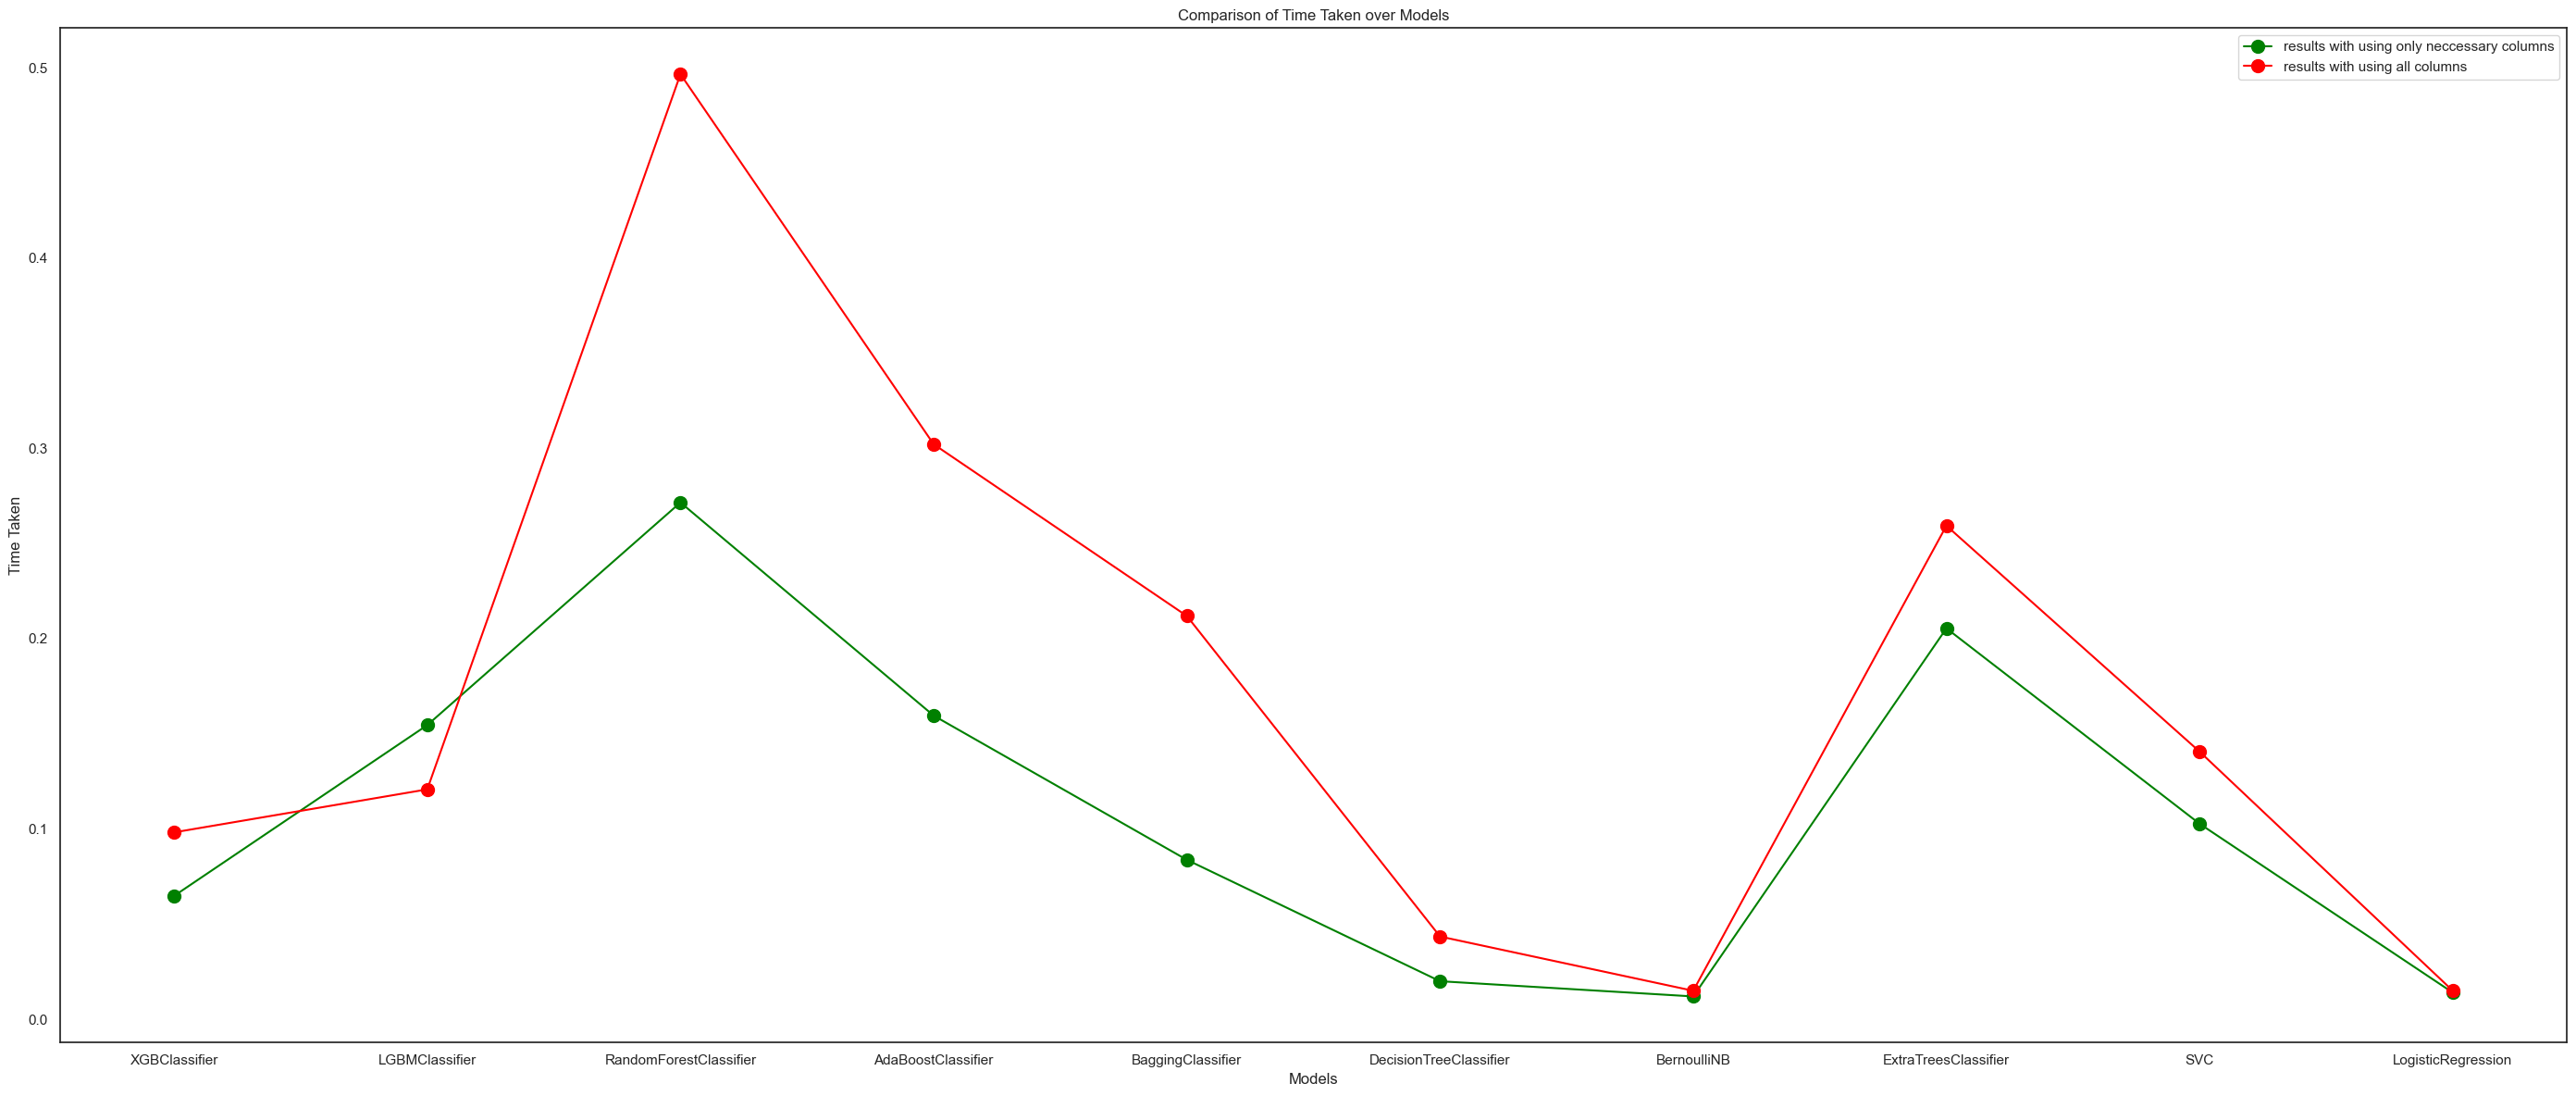

In [25]:
plt.figure(figsize=(28,12))
plt.plot(models_to_look_at,time_taken1,marker="o",markersize=10,color="green",label="results with using only neccessary columns")
plt.plot(models_to_look_at,time_taken2,marker="o",markersize=10,color="red",label="results with using all columns")
plt.xlabel('Models')
plt.ylabel('Time Taken')
plt.title('Comparison of Time Taken over Models')
plt.tight_layout()
plt.legend()
plt.show()

Obviously since we are excluding many columns we have less data to process thus using only necessary columns is the ideal solution since it yields better results and costs less time

# **Creating a model for top 3 Algorithms**

Our later analysis had led us that it would be ideal to use only necessary features.

So we will be doing that when building our top 3 models

1.   XGBClassifier
2.   LGBMClassifier
3.   RandomForestClassifier



# Splitting data

In [26]:
needed_columns = ['Age', 'EducationLevel','FamilyHistoryAlzheimers', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness']



x=df.drop(df.columns.difference(needed_columns),axis=1)
y = df["Diagnosis"]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=48)

results = {}

  # XGBClassifier

In [27]:
xg = XGBClassifier()
start_time = time.time()
xg.fit(x_train, y_train)
end_time = time.time()

xg_scores_average = cross_val_score(xg, x, y, cv=10).mean()

xg_time = end_time - start_time
results['XGBClassifier'] = {'accuracy': xg_scores_average*100, 'time': xg_time}

print(results['XGBClassifier'])



{'accuracy': np.float64(94.67594001304066), 'time': 0.06183362007141113}


# LGBMClassifier

In [28]:
lm = LGBMClassifier()
start_time = time.time()
lm.fit(x_train, y_train)
end_time = time.time()

lm_scores_average = cross_val_score(lm, x, y, cv=10).mean()

lm_time = end_time - start_time
results['LGBMClassifier'] = {'accuracy': lm_scores_average*100, 'time': lm_time}

print(results['LGBMClassifier'])



[LightGBM] [Info] Number of positive: 615, number of negative: 1099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 1714, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358810 -> initscore=-0.580534
[LightGBM] [Info] Start training from score -0.580534
[LightGBM] [Info] Number of positive: 679, number of negative: 1249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 1928, number of used features: 13
[LightGBM] [Info] [binary:Bo

# RandomForestClassifier

In [29]:
rf = RandomForestClassifier(random_state=48)
start_time = time.time()
rf.fit(x_train, y_train)
end_time = time.time()

rf_scores_average = cross_val_score(rf, x, y, cv=10).mean()

rf_time = end_time - start_time
results['RandomForestClassifier'] = {'accuracy': rf_scores_average*100, 'time': rf_time}

print(results['RandomForestClassifier'])



{'accuracy': np.float64(95.00239078461206), 'time': 0.27629566192626953}


# Best of the 3, which will be used in creating a system to predict whether patients have Alzheimer or not

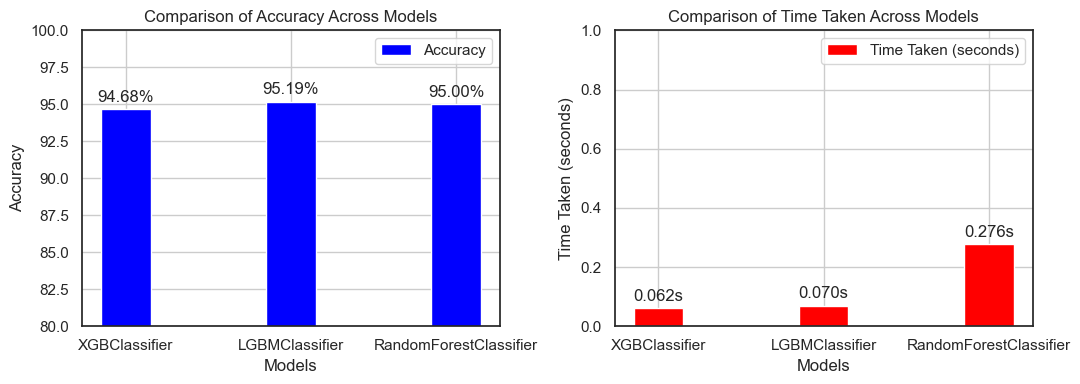

In [30]:
three_models = list(results.keys())
accuracy_values = [results[model]['accuracy'] for model in three_models]
time_values = [results[model]['time'] for model in three_models]


fig, axes = plt.subplots(1, 2, figsize=(11, 4))


bars_accuracy = axes[0].bar(three_models, accuracy_values, color="blue", label="Accuracy", width=0.3)
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Comparison of Accuracy Across Models')
axes[0].grid(True)
axes[0].set_ylim(80, 100)
axes[0].legend()

for bar in bars_accuracy:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')


bars_time = axes[1].bar(three_models, time_values, color="red", label="Time Taken (seconds)", width=0.3)
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Time Taken (seconds)')
axes[1].set_title('Comparison of Time Taken Across Models')
axes[1].grid(True)
axes[1].set_ylim(0, 1)
axes[1].legend()


for bar in bars_time:
    height = bar.get_height()
    axes[1].annotate(f'{height:.3f}s',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()



**From the previous two graph we conclude the following:**

*    The accuracy difference between three models is very small and not noticeable but LGBMClassifier is the highest accuracy
*   The time difference is large between the RandomForstClassifier and the rest, XGBClassifier is the lowest time taken, but LGBMClassifier is extremly close to it


**Based on this, the performance of LGBMClassifier is the best, so we decided to build our system using it**






# Predictive System


In [31]:
def pred(Age, EducationLevel,FamilyHistoryAlzheimers, MMSE, FunctionalAssessment,
       MemoryComplaints, BehavioralProblems, ADL, Confusion,
       Disorientation, PersonalityChanges, DifficultyCompletingTasks,
       Forgetfulness):

  input_data = (Age, EducationLevel,FamilyHistoryAlzheimers, MMSE, FunctionalAssessment,
       MemoryComplaints, BehavioralProblems, ADL, Confusion,
       Disorientation, PersonalityChanges, DifficultyCompletingTasks,
       Forgetfulness)
  input_data_as_array = np.asarray(input_data)
  input_data_reshaped = input_data_as_array.reshape(1,-1)

  prediction = lm.predict(input_data_reshaped)[0]
  if prediction==1:
    return 1
  else:
    return 0


# **Sensitivity and Specificity Test**
In medicine in general, before adopting any examination, this test is performed in order to calculate the sensitivity and specificity of the examination, in order to determine whether the Test is useful for diagnosing the disease or whether it is useful for ruling out the disease.

In [32]:
needed_columns = ['Age', 'EducationLevel','FamilyHistoryAlzheimers', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness']



x=df.drop(df.columns.difference(needed_columns),axis=1)
y = df["Diagnosis"]
x=x.iloc[:650]
y=y.iloc[:650]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=48)

lm = LGBMClassifier()
lm.fit(x_train, y_train)






df2 = df.iloc[-1500:]
actual_results = df2["Diagnosis"].tolist()
correct_one = 0
all_one = 0
correct_zero = 0
all_zero = 0
df2.drop(df2.columns.difference(needed_columns),axis=1,inplace=True)
for i in range(1500):
  da=df2.iloc[i].tolist()
  if actual_results[i] == 1:
    all_one+=1
    if pred(da[0],da[1],da[2],da[3],da[4],da[5],da[6],da[7],da[8],da[9],da[10],da[11],da[12])==actual_results[i]:
      correct_one+=1
  else:
    all_zero+=1
    if pred(da[0],da[1],da[2],da[3],da[4],da[5],da[6],da[7],da[8],da[9],da[10],da[11],da[12])==actual_results[i]:
      correct_zero+=1

print(f"all_zero = {all_zero} , correct_zero = {correct_zero}")
print(f"all_one = {all_one} , correct_one = { correct_one}")

print(f"Specifity = {correct_zero/all_zero*100:.2f}%")
print(f"Sensitivity = {correct_one/all_one*100:.2f}%")

[LightGBM] [Info] Number of positive: 165, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 520, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.317308 -> initscore=-0.766172
[LightGBM] [Info] Start training from score -0.766172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


*   Sensitivity: the ability of a test to correctly identify patients with a disease.
*   Specificity: the ability of a test to correctly identify people without the disease.

Therefore, it can be considered that our test is good for diagnosing the disease, but it is very excellent for excluding the disease


# **Exporting the model**

In [33]:
def creating_model():
  needed_columns = ['Age', 'EducationLevel','FamilyHistoryAlzheimers', 'MMSE', 'FunctionalAssessment',
        'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
        'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
        'Forgetfulness']



  x=df.drop(df.columns.difference(needed_columns),axis=1)
  y = df["Diagnosis"]

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=48)

  model = LGBMClassifier()
  model.fit(x_train, y_train)


  return model
model = creating_model()



[LightGBM] [Info] Number of positive: 615, number of negative: 1099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 1714, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358810 -> initscore=-0.580534
[LightGBM] [Info] Start training from score -0.580534


exporting the model to be used in the webapp

In [34]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']